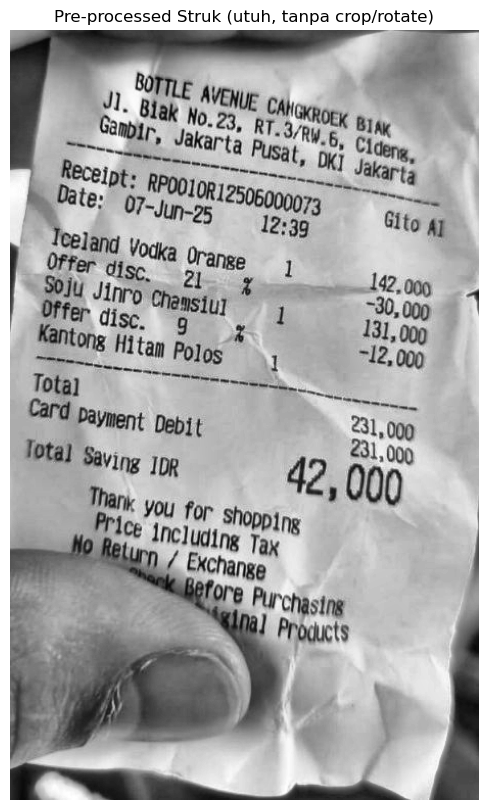

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


J] 
No.23. RT 
6, Cic
DKI
AI
Soju
21
142.000
Offer
30,000
131,000
Hitam
~12,000
Total
Debit
000
231,000
42,
you for
Ho
Products
BOTTLE
AVENUE
CAHGKROEK
Biak
Ganbir,
BIAK
3/RW .
Jakarta
Pusat,
Ideng .
Receipt:
Jakarta
Rpoo1or12506000073
Date:
07-Jun--25
Gito
12:39
Iceland
Vodka
Orange
Offer
disc-
Jinro
Chamsiul
disc:
Kantong
Polos
Card
payment
331,C
Total
Saving
IdR
O00
Tharik
shopping
Price
Including
Tax
Return
Exchange
Before
Purchasing
rlnal


In [ ]:
import cv2
import numpy as np
import easyocr
from matplotlib import pyplot as plt

# ===== 1. Load gambar =====
img_path = "../dataset/test/img/abel.jpg"
img = cv2.imread(img_path)

# ===== 2. Grayscale =====
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# ===== 3. Tingkatkan kontras (CLAHE) =====
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
gray = clahe.apply(gray)

# ===== 4. Deskew =====
coords = np.column_stack(np.where(gray > 0))
angle = cv2.minAreaRect(coords)[-1]
if angle < -45:
    angle = -(90 + angle)
else:
    angle = -angle

(h, w) = gray.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(gray, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

# ===== 5. Crop margin =====
h, w = rotated.shape
crop = rotated[int(0.1*h):int(0.9*h), int(0.1*w):int(0.9*w)]

# ===== 6. Tampilkan hasil pre-processing =====
plt.figure(figsize=(8, 10))
plt.imshow(crop, cmap='gray')
plt.title("Pre-processed Struk")
plt.axis('off')
plt.show()

# ===== 7. OCR EasyOCR =====
reader = easyocr.Reader(['en'])
results = reader.readtext(crop, detail=0)
text = "\n".join(results)
print(text)
